In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
data=pd.read_csv('F:/Deep Learning/NLP/spam.csv',encoding="latin_1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [6]:
data = data.rename(columns={"v1":"label", "v2":"text"})

In [7]:
data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [8]:
data['label_num'] = data.label.map({'ham':1, 'spam':0})

In [9]:
data.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",1
1,ham,Ok lar... Joking wif u oni...,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0
3,ham,U dun say so early hor... U c already then say...,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",1


In [10]:
data['length'] = data['text'].apply(len)
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [11]:
x=np.array(data['text'])
x


array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ..., 'Pity, * was in mood for that. So...any other suggestions?',
       "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free",
       'Rofl. Its true to its name'], dtype=object)

In [12]:
y = np.array(data['label_num'])
y

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

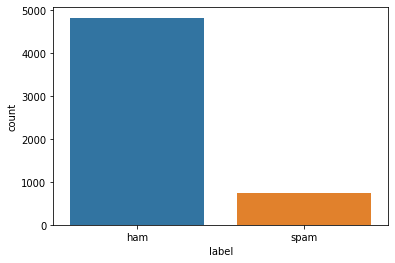

In [13]:
sns.countplot(data["label"])
plt.show()

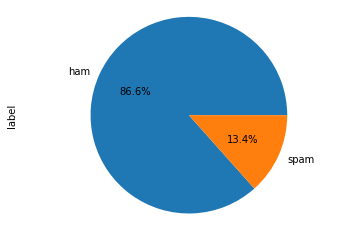

In [14]:
data["label"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.axis("equal")
plt.show()

In [15]:
spam1=data.loc[data['label']=='spam'].reset_index(drop=True)
spam1.head()

,label,text,label_num,length
0,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
1,spam,FreeMsg Hey there darling it's been 3 week's n...,0,148
2,spam,WINNER!! As a valued network customer you have...,0,158
3,spam,Had your mobile 11 months or more? U R entitle...,0,154
4,spam,"SIX chances to win CASH! From 100 to 20,000 po...",0,136


In [16]:
ham1=data.loc[data['label']=='ham'].reset_index(drop=True)
ham1.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,ham,U dun say so early hor... U c already then say...,1,49
3,ham,"Nah I don't think he goes to usf, he lives aro...",1,61
4,ham,Even my brother is not like to speak with me. ...,1,77


In [17]:
x_train=np.array(data.iloc[0:500,1])
x_train.shape

(500,)

In [18]:
y_train=np.array(data.iloc[0:500,0])
y_train[0:5]

array(['ham', 'ham', 'spam', 'ham', 'ham'], dtype=object)

# Using CountVectorizer

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [22]:
train_data = count_vector.fit_transform(x_train)
test_data = count_vector.transform(x_test)

In [23]:
from sklearn.naive_bayes import MultinomialNB

In [24]:
model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [25]:
test_data

<1672x7201 sparse matrix of type '<class 'numpy.int64'>'
	with 20513 stored elements in Compressed Sparse Row format>

In [26]:
pred=model.predict(test_data)
pred

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [27]:
model.score(test_data,y_test)

0.9832535885167464

In [28]:
#creating testing data
x_test=[ "hi how are you","when will you go to home", "i will call you back", "are you busy now",
        "WINNER!! As a valued network customer you have..."]

In [29]:
x_test.append("goodmoring")

In [30]:
x_test

['hi how are you',
 'when will you go to home',
 'i will call you back',
 'are you busy now',
 'WINNER!! As a valued network customer you have...',
 'goodmoring']

In [31]:
x_test1=np.array(x_test)
x_test1

array(['hi how are you', 'when will you go to home',
       'i will call you back', 'are you busy now',
       'WINNER!! As a valued network customer you have...', 'goodmoring'],
      dtype='<U49')

In [32]:
X_train=data.iloc[0:200,1]
X_train[0:6]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: text, dtype: object

In [33]:
Y_train=data.iloc[0:200,0]
Y_train[0:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: label, dtype: object

In [34]:
X_train.shape,x_test1.shape

((200,), (6,))

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()
print(count_vector)

CountVectorizer()


In [36]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(x_test1)

In [37]:
train_data.shape

(200, 1159)

In [38]:
test_data.shape

(6, 1159)

In [39]:
Y_train.shape

(200,)

In [40]:
from sklearn.naive_bayes import MultinomialNB

In [41]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB()

In [42]:
pred=model.predict(test_data)
pred

array(['ham', 'ham', 'ham', 'ham', 'spam', 'ham'], dtype='<U4')

In [43]:
df = pd.DataFrame(dict(x=x_test1, y=pred))
df

,x,y
0,hi how are you,ham
1,when will you go to home,ham
2,i will call you back,ham
3,are you busy now,ham
4,WINNER!! As a valued network customer you have...,spam
5,goodmoring,ham


In [44]:
df.iloc[3:]

,x,y
3,are you busy now,ham
4,WINNER!! As a valued network customer you have...,spam
5,goodmoring,ham


In [45]:
data.head()

,label,text,label_num,length
0,ham,"Go until jurong point, crazy.. Available only ...",1,111
1,ham,Ok lar... Joking wif u oni...,1,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,155
3,ham,U dun say so early hor... U c already then say...,1,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,61


In [46]:
ham=data[data['label']=='ham'][:747]
spam=data[data['label']=='spam']
ham.shape,spam.shape

((747, 4), (747, 4))

In [47]:
data2=pd.concat([ham,spam])
data2=data2.sample(frac=1,random_state=40)
data2.head()

,label,text,label_num,length
98,ham,Hi. Wk been ok - on hols now! Yes on for a bit...,1,184
249,spam,Congratulations ur awarded 500 of CD vouchers ...,0,150
441,ham,You were supposed to wake ME up &gt;:(,1,38
85,ham,"I call you later, don't have network. If urgnt...",1,55
562,ham,Geeeee ... I love you so much I can barely sta...,1,51


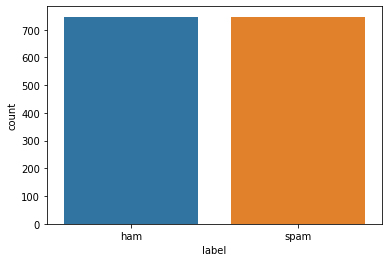

In [48]:
sns.countplot(x='label',data=data2)

In [49]:
data2['label'] = data2.label.map({'ham':1, 'spam':0})

In [50]:
data2.head()

,label,text,label_num,length
98,1,Hi. Wk been ok - on hols now! Yes on for a bit...,1,184
249,0,Congratulations ur awarded 500 of CD vouchers ...,0,150
441,1,You were supposed to wake ME up &gt;:(,1,38
85,1,"I call you later, don't have network. If urgnt...",1,55
562,1,Geeeee ... I love you so much I can barely sta...,1,51


In [51]:
X=np.array(data2['text'])
X

array(['Hi. Wk been ok - on hols now! Yes on for a bit of a run. Forgot that i have hairdressers appointment at four so need to get home n shower beforehand. Does that cause prob for u?\\"\rham"',
       'Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16',
       'You were supposed to wake ME up &gt;:(', ...,
       "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
       'Where are you lover ? I need you ...',
       '3. You have received your mobile content. Enjoy'], dtype=object)

In [52]:
Y=np.array(data2['label'])
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector = CountVectorizer()

In [55]:
train_data = count_vector.fit_transform(X_train)
test_data = count_vector.transform(X_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB

In [57]:
model=MultinomialNB()
model.fit(train_data,Y_train)

MultinomialNB()

In [58]:
pred=model.predict(test_data)
pred

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0], dtyp

In [59]:
model.score(test_data,Y_test)

0.9565217391304348

# Using TfidfVectorizer

In [60]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [62]:
tf=TfidfVectorizer()

In [63]:
train_data = tf.fit_transform(x_train)
test_data = tf.transform(x_test)

In [64]:
from sklearn.naive_bayes import MultinomialNB

In [65]:
model=MultinomialNB()
model.fit(train_data,y_train)

MultinomialNB()

In [66]:
pred=model.predict(test_data)
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [67]:
model.score(test_data,y_test)

0.9611244019138756

# USING WORDCLOUD

In [68]:
from os import path, getcwd
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator

In [69]:
#for visualizing using wordcloud
# Start with one review:
Text=spam1['text'][0]

In [70]:
Text

"Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"

In [71]:
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(Text)

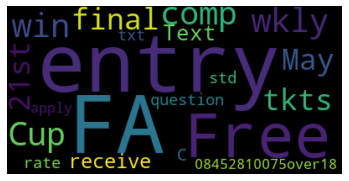

In [72]:
# Display the generated image:# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

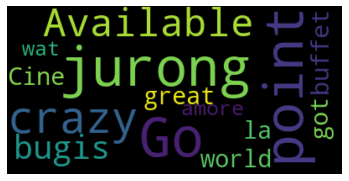

In [73]:
Text1=ham1['text'][0]
wordcloud=WordCloud().generate(Text1)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

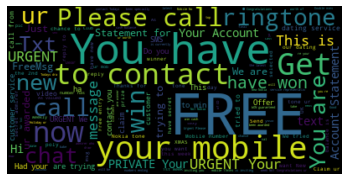

In [74]:
#displaying all spam mails
Text2=spam['text'].to_string()
wordcloud=WordCloud().generate(Text2)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

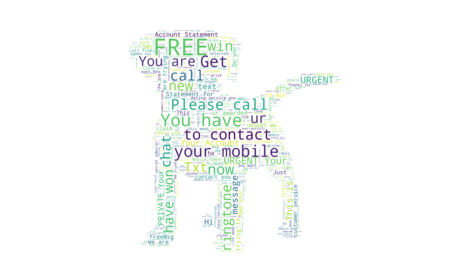

In [75]:
d = getcwd()

Text=spam1['text'].to_string()
mask= np.array(Image.open('G:/puppy.jpg'))
#mask = np.array(Image.open(path.join(d, "puppy.jpg")))--> to join working directory and image
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               max_font_size=100, random_state=42)
wc.generate(Text)
# create coloring from image
#image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[8,8])
plt.imshow(wc, interpolation="bilinear") #plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

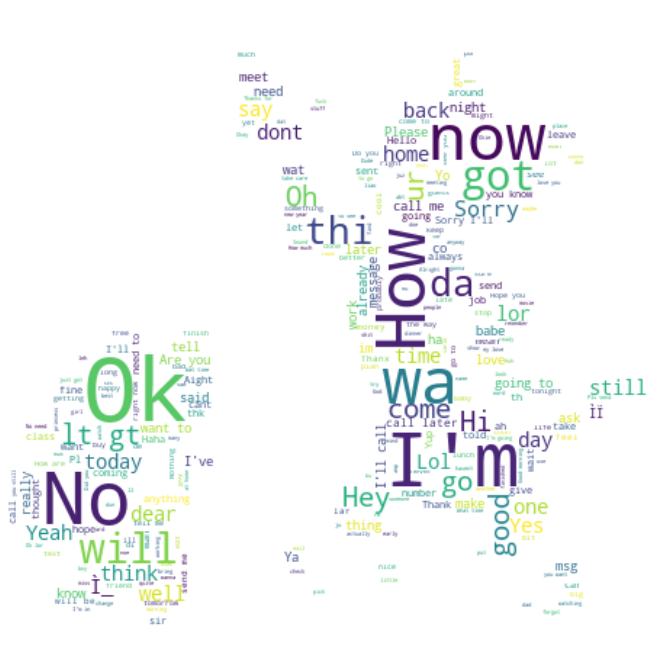

In [76]:
Text=ham1['text'].to_string()
mask= np.array(Image.open('G:/tomjerry.jpg'))
wc = WordCloud(background_color="white", max_words=2000, mask=mask,
               max_font_size=60, random_state=42)
wc.generate(Text)
plt.figure(figsize=[12,12])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

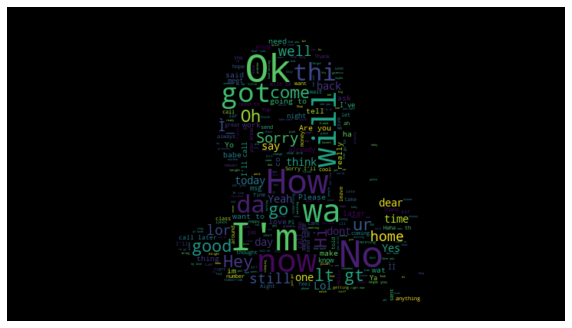

In [77]:
Text=ham1['text'].to_string()
mask= np.array(Image.open('G:/messi.jpg'))
wc = WordCloud(background_color="black", max_words=4000, mask=mask,
               max_font_size=50, random_state=42)
wc.generate(Text)
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()